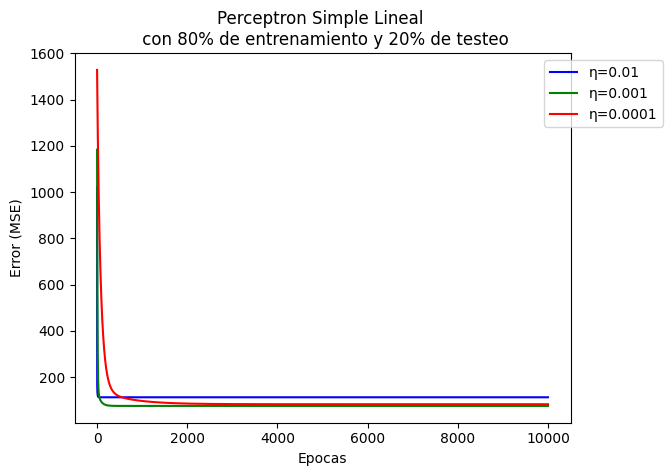

KeyboardInterrupt: 

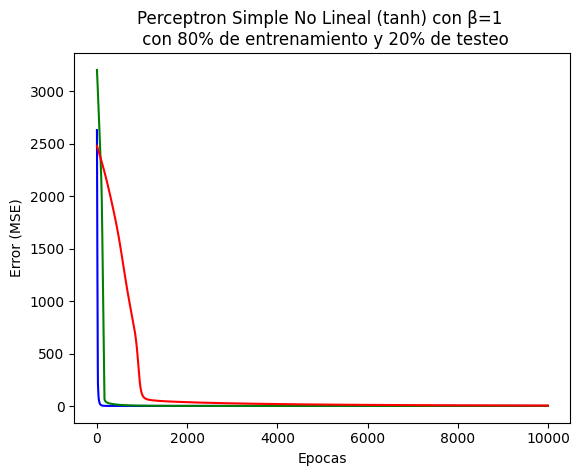

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import get_data
from src.perceptron import Perceptron
import math
from src.utils import perceptron_type_str, get_train_type

PERCEPTRON_TYPE = ["LINEAR", "NON_LINEAR_TANH", "NON_LINEAR_LOG"]
TRAINING_TYPE = ["PERCENTAGE", "K-FOLD"]
LR = 0.01
EPOCHS = 10000
BETA = 1
MIN_ERROR = 0.1
TRAINING_PERCENTAGE = 0.8
K_FOLD = 4

input_data, expected_data = get_data(1)


#-------------------------------------------------
# VARIANDO EL LEARNING RATE
#-------------------------------------------------

arr_of_errors = []
arr_of_epochs = []
lrs = [LR*(10**(-i)) for i in range(3)]

for i, perceptron_type in enumerate(PERCEPTRON_TYPE):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for lr in lrs:
        perceptron = Perceptron(input_data, expected_data, perceptron_type, lr, EPOCHS, BETA, MIN_ERROR, "PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)
        weights, mse_errors, test_mse, total_epochs = perceptron.train()
        arr_of_error_aux.append(mse_errors)
        arr_of_epochs_aux.append(total_epochs)
        
    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red']

for i, perceptron_type in enumerate(PERCEPTRON_TYPE):
    for j in range(len(arr_of_errors[i])):
        plt.plot(range(arr_of_epochs[i][j]), arr_of_errors[i][j], color=colors[j], label=f"η={lrs[j]}")
    plt.title(f'Perceptron Simple {perceptron_type_str(perceptron_type, BETA)} \n con {get_train_type("PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)}')
    plt.xlabel("Epocas")
    plt.ylabel("Error (MSE)")
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()
       

In [ ]:
#-------------------------------------------------
# VARIANDO EL BETA
#-------------------------------------------------

PERCEPTRON_NON_LINEAR_TYPES = ["NON_LINEAR_TANH", "NON_LINEAR_LOG"]
arr_of_errors = []
arr_of_epochs = []
BETAS = [round(0.2*i,2) for i in range(1,8)]
LR = 0.0001
EPOCHS = 10000
BETA = 1
MIN_ERROR = 0.1

for i, perceptron_type in enumerate(PERCEPTRON_NON_LINEAR_TYPES):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for beta in BETAS:
        perceptron = Perceptron(input_data, expected_data, perceptron_type, LR, EPOCHS, beta, MIN_ERROR, "PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)
        weights, mse_errors, test_mse, total_epochs = perceptron.train()
        arr_of_error_aux.append(mse_errors)
        arr_of_epochs_aux.append(total_epochs)
        
    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', "yellow"]

for i, perceptron_type in enumerate(PERCEPTRON_NON_LINEAR_TYPES):
    for j in range(len(arr_of_errors[i])):
        plt.plot(range(arr_of_epochs[i][j]), arr_of_errors[i][j], color=colors[j], label=f"β={BETAS[j]}")
    plt.title(f'Perceptron Simple No Lineal ({"tanh" if i==0 else "log"}) \n con {get_train_type("PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)}')
    plt.xlabel("Epocas")
    plt.ylabel("Error (MSE)")
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()

In [ ]:
#-------------------------------------------------
# VARIANDO LOS PORCENTAJES
#-------------------------------------------------

PERCEPTRON_TYPE = ["LINEAR", "NON_LINEAR_TANH", "NON_LINEAR_LOG"]
LR = 0.001
EPOCHS = 20000
BETA = 1
MIN_ERROR = 0.1
TRAIN_PERCENTAGES = [round(0.1*i,2) for i in range(1,10)]
ITERATIONS = 20

arr_avg_train_mses = []
arr_std_train_mses = []
arr_avg_test_mses = []
arr_std_test_mses = []

for i, perceptron_type in enumerate(PERCEPTRON_TYPE):
    avg_train_mses = []
    std_train_mses = []
    avg_test_mses = []
    std_test_mses = []
    for p in TRAIN_PERCENTAGES:
        train = []
        test = []
        for iter in range(ITERATIONS):
            perceptron = Perceptron(input_data, expected_data, perceptron_type, LR, EPOCHS, BETA, MIN_ERROR, "PERCENTAGE", p, K_FOLD)
            weights, mse_errors, test_mse, total_epochs = perceptron.train()
            train.append(perceptron.train_MSE)
            test.append(test_mse)
            
        train_aux = sum(train) / len(train)
        avg_train_mses.append(train_aux)
        error_train = np.std(train) / np.sqrt((len(train)))
        std_train_mses.append(error_train)
        
        test_aux = sum(test) / len(test)
        avg_test_mses.append(test_aux)
        error_test = np.std(test) / np.sqrt((len(test)))
        std_test_mses.append(error_test)
                    
    arr_avg_train_mses.append(avg_train_mses)
    arr_std_train_mses.append(std_train_mses)
    arr_avg_test_mses.append(avg_test_mses)
    arr_std_test_mses.append(std_test_mses)
    
colors = ['blue', 'green']

WIDTH = 0.25
br1 = np.arange(len(TRAIN_PERCENTAGES))
br2 = [x + WIDTH for x in br1]

for i, perceptron_type in enumerate(PERCEPTRON_TYPE):
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_train_mses[i], yerr=arr_std_train_mses[i], color="blue", capsize=4, label="Train")
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_test_mses[i], yerr=arr_std_test_mses[i], color="red", capsize=4, label="Test")
    plt.title(f'Perceptron Simple {perceptron_type_str(perceptron_type, BETA)} \n η={LR} \n con {get_train_type("PERCENTAGE", TRAINING_PERCENTAGE, K_FOLD)}')
    plt.xlabel("Porcentaje de entrenamiento")
    plt.ylabel("MSE")
    #plt.xticks([r + WIDTH/2 for r in range(len(TRAIN_PERCENTAGES))], TRAIN_PERCENTAGES)
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()